In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np

from ntp.geometry_primitives import Line

In [2]:
def points(t: float):
    n_points = 20
    z = np.linspace(0, 2 * np.pi, n_points)
#     x = np.sin(z+t) + 0.02 * np.random.normal(0, size=n_points)
#     y = np.cos(z-0.5*t) + 0.02 * np.random.normal(0, size=n_points) + np.cos(x)
    x = np.sin(z+t)
    y = np.cos(z-0.5*t)
    return np.column_stack((x,y,z))

In [3]:
t = np.linspace(0, 4*np.pi, 1000)


In [4]:
def initialise_figure():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    line = Line(points(t[0]))
    markers = ax.scatter(line.x, line.y, line.z, c='tab:purple', marker='o')
    backbone = line.backbone_visualisation
    bx = backbone[:, 0]
    by = backbone[:, 1]
    bz = backbone[:, 2]
    line = ax.plot(bx, by, bz, c='tab:purple', linestyle='-')[0]
    return fig, ax, markers, line

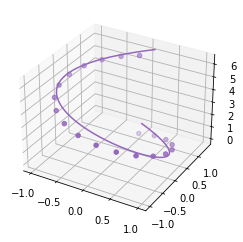

In [5]:
fig, ax, markers, line3d = initialise_figure()

In [6]:
def animate(frame):
    xl = ax.get_xlim()
    yl = ax.get_ylim()
    zl = ax.get_zlim()
    ax.clear()
    xyz = points(frame)
    line = Line(xyz)
    backbone = line.backbone_visualisation
    bx = backbone[:, 0]
    by = backbone[:, 1]
    bz = backbone[:, 2]
    ax.plot(bx, by, bz, c='tab:purple', linestyle='-')
    ax.scatter(line.x, line.y, line.z, c='tab:purple', marker='o')
    ax.set(xlim=xl, ylim=yl, zlim=zl)
    ax.axis('off')
    return markers, line3d

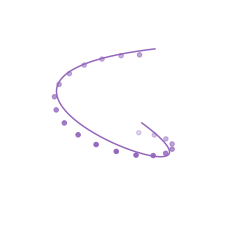

In [7]:
fig, ax, markers, line3d = initialise_figure()
a = FuncAnimation(fig, animate, frames=t, interval=5)
HTML(a.to_html5_video())